<a href="https://colab.research.google.com/github/Sahil-Jagadale/ML_PRACTICALS/blob/main/Problem_Statement_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv("Social_Network_Ads.csv")

In [4]:
data.shape

(400, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
x = data[['Age','EstimatedSalary']]

In [8]:
sc = StandardScaler()
x= sc.fit_transform(x)

In [9]:
clusters = []
for i in range(1,25):
  kmeans = KMeans(n_clusters=i,n_init=10,random_state=10)
  kmeans.fit(x)
  clusters.append(kmeans.inertia_)

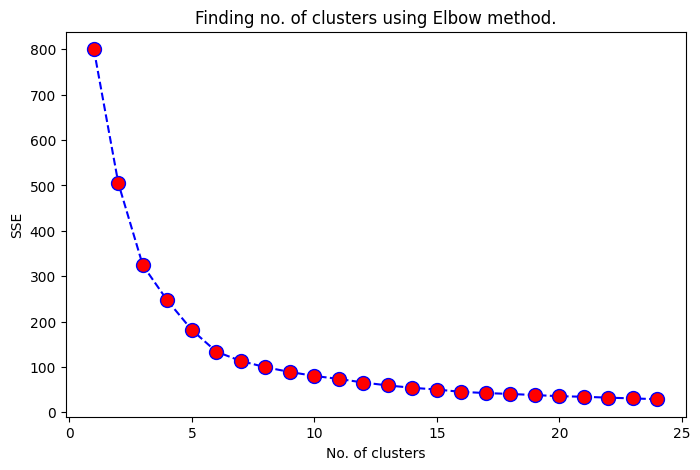

In [10]:
plt.figure(figsize=(8,5))
plt.plot(range(1,25),clusters,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title("Finding no. of clusters using Elbow method.")
plt.xlabel("No. of clusters")
plt.ylabel("SSE")
plt.show()

In [11]:
#From above figure we get no. of clusters = 3

In [12]:
kmeans= KMeans(n_clusters=5,random_state=10)
kmeans.fit(x)
pred = kmeans.predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
pred

array([4, 4, 4, 4, 0, 4, 0, 3, 4, 2, 0, 4, 0, 4, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 0, 0, 4, 4, 0, 4, 4, 4, 0, 4, 4, 2, 0, 4,
       0, 4, 0, 4, 0, 0, 4, 4, 0, 4, 4, 4, 4, 0, 4, 0, 4, 0, 0, 0, 1, 4,
       4, 0, 0, 2, 0, 4, 4, 0, 4, 0, 4, 4, 0, 4, 0, 2, 4, 2, 2, 0, 4, 0,
       0, 2, 0, 0, 4, 4, 0, 2, 4, 0, 2, 4, 0, 4, 0, 3, 4, 0, 4, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 0, 2, 4,
       0, 0, 4, 0, 0, 0, 4, 4, 0, 0, 2, 0, 4, 0, 0, 1, 4, 0, 4, 2, 0, 2,
       2, 4, 1, 0, 4, 0, 0, 0, 4, 4, 2, 0, 4, 2, 0, 4, 0, 0, 0, 4, 2, 4,
       2, 4, 4, 4, 4, 0, 0, 4, 2, 2, 0, 4, 2, 4, 0, 4, 4, 0, 0, 4, 0, 4,
       0, 4, 4, 1, 3, 2, 3, 1, 3, 3, 3, 1, 3, 3, 1, 2, 1, 3, 1, 2, 3, 3,
       2, 0, 3, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2,
       3, 3, 2, 3, 2, 3, 2, 0, 1, 2, 3, 3, 1, 3, 2, 2, 3, 3, 2, 3, 3, 2,
       3, 3, 2, 2, 3, 2, 3, 1, 1, 3, 1, 1, 2, 3, 1, 1, 3, 2, 2, 1, 3, 2,
       2, 3, 2, 2, 3, 3, 1, 2, 2, 2, 2, 3, 2, 3, 1,

In [14]:
data['Cluster'] = pred

In [15]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Cluster
0,15624510,Male,19,19000,0,4
1,15810944,Male,35,20000,0,4
2,15668575,Female,26,43000,0,4
3,15603246,Female,27,57000,0,4
4,15804002,Male,19,76000,0,0


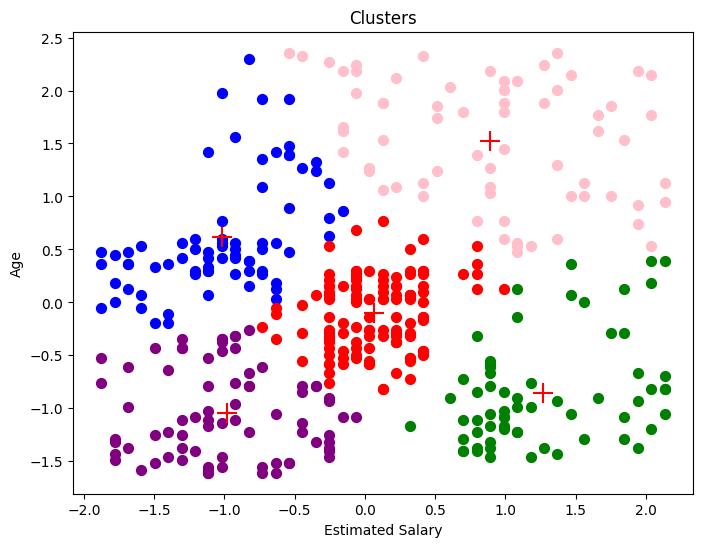

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(x[pred == 0,0],x[pred == 0,1],c='blue',marker='o',s=50)
plt.scatter(x[pred == 1,0],x[pred == 1,1],c='green',marker='o',s=50)
plt.scatter(x[pred == 2,0],x[pred == 2,1],c='red',marker='o',s=50)
plt.scatter(x[pred == 3,0],x[pred == 3,1],c='pink',marker='o',s=50)
plt.scatter(x[pred == 4,0],x[pred == 4,1],c='purple',marker='o',s=50)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='red', marker='+', s=200)
plt.title("Clusters")
plt.xlabel("Estimated Salary")
plt.ylabel('Age')
plt.show()